In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [21]:
# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Some points to note out from this data:
- BMI: Higher BMI is associated with an increased risk of stroke.
- Age: Advanced age is a significant risk factor for stroke, with the risk increasing as individuals get older.
- Gender: Men and postmenopausal women have a higher risk of stroke compared to premenopausal women.
- Smoking Status: Smoking significantly increases the risk of stroke due to the harmful effects of tobacco on blood vessels.
- Heart Disease: People with heart disease have a higher risk of stroke, as both conditions share similar risk factors and underlying vascular issues.

In [23]:
df = data.copy()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [26]:
df["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [27]:
df = df.dropna(axis= 0)

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


<Axes: ylabel='smoking_status'>

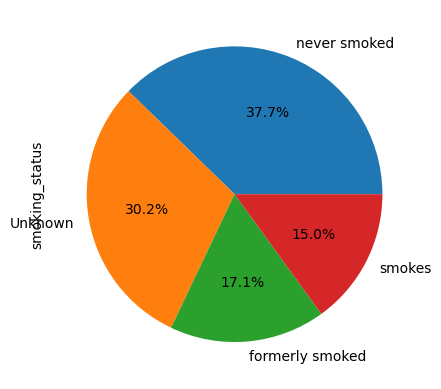

In [28]:
print(df["smoking_status"].value_counts())
df["smoking_status"].value_counts().plot.pie(autopct = "%1.1f%%")

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


<Axes: ylabel='Residence_type'>

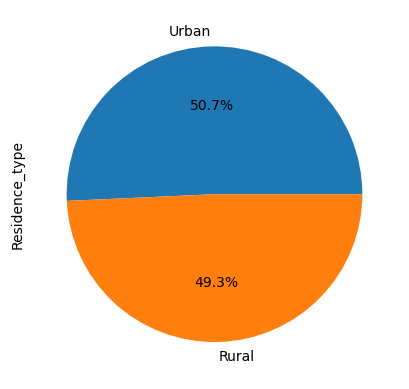

In [29]:
print(df["Residence_type"].value_counts())
df["Residence_type"].value_counts().plot.pie(autopct = "%1.1f%%")

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


<Axes: ylabel='work_type'>

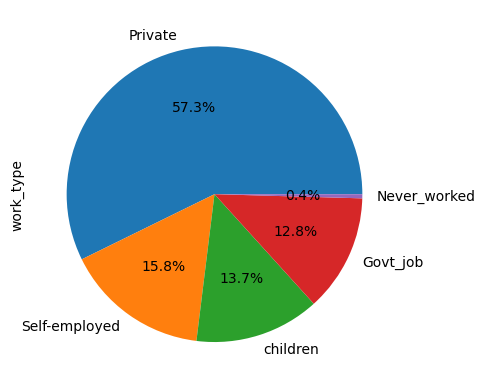

In [30]:
print(df["work_type"].value_counts())
df["work_type"].value_counts().plot.pie(autopct ="%1.1f%%")

Yes    3204
No     1705
Name: ever_married, dtype: int64


<Axes: ylabel='ever_married'>

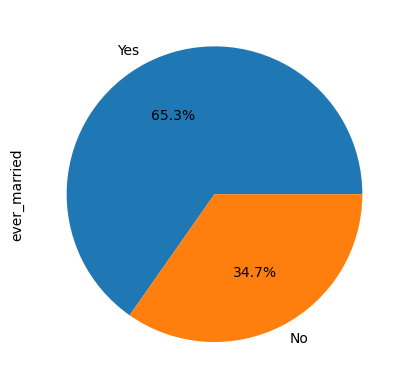

In [31]:
print(df["ever_married"].value_counts())
df["ever_married"].value_counts().plot.pie(autopct = "%1.1f%%")

0    4666
1     243
Name: heart_disease, dtype: int64


<Axes: ylabel='heart_disease'>

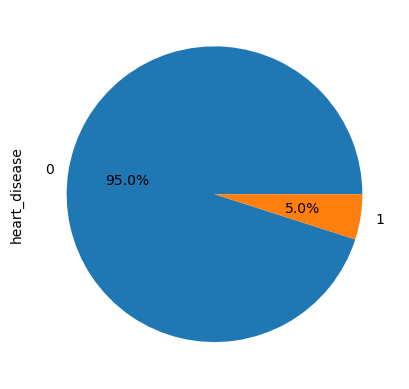

In [32]:
print(df["heart_disease"].value_counts())
df["heart_disease"].value_counts().plot.pie(autopct = "%1.1f%%")

0    4458
1     451
Name: hypertension, dtype: int64


<Axes: ylabel='hypertension'>

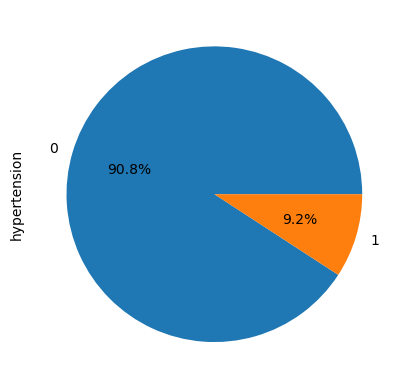

In [33]:
print(df["hypertension"].value_counts())
df["hypertension"].value_counts().plot.pie(autopct = '%1.1f%%')

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


<Axes: ylabel='gender'>

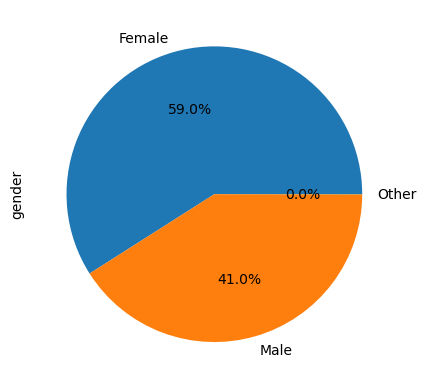

In [34]:
print(df["gender"].value_counts())
df["gender"].value_counts().plot.pie(autopct='%1.1f%%')

# Drop columns Id

In [35]:
df = df.drop(columns='id')

In [36]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## pre-processing

In [37]:
df_test = df.copy()

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [39]:
X = df_test.drop('stroke', axis = 1)
y = df_test['stroke']

### imput Nan

In [40]:
"""imputer =KNNImputer(n_neighbors=3)
bmi = df["bmi"]
bmi_filled = imputer.fit_transform(bmi.values.reshape(-1,1))
df["bmi"] = bmi_filled"""

'imputer =KNNImputer(n_neighbors=3)\nbmi = df["bmi"]\nbmi_filled = imputer.fit_transform(bmi.values.reshape(-1,1))\ndf["bmi"] = bmi_filled'

In [41]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### encoding

In [43]:
encode = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encode.fit_transform(X=X)

### normalisation

In [44]:
norm = StandardScaler(with_mean=False)
X_norm = norm.fit_transform(X_encoded)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=1)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.model_selection import learning_curve

In [47]:
def evaluation(model):

    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    ypred = model.predict(X_test)

    # print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    # N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1, 10), scoring="f1")

    # plt.figure()
    # plt.plot(N, train_score.mean(axis=1), label="train score")
    # plt.plot(N, val_score.mean(axis=1), label= 'val score')
    # plt.legend()
    # plt.show()

In [48]:
random = RandomForestClassifier(random_state=1)
tree = DecisionTreeClassifier(random_state=1)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=10)

In [49]:
dict_of_models = {"random" : random,
                    "decision_tree" : tree,
                    "svm" : svm,
                    "KNN" : knn
}

In [50]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

random
0.9480651731160896
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       931
           1       0.00      0.00      0.00        51

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.90      0.95      0.92       982

decision_tree
0.9409368635437881
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       931
           1       0.11      0.02      0.03        51

    accuracy                           0.94       982
   macro avg       0.53      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982

svm
0.9480651731160896
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       931
           1       0.00      0.00      0.00        51

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49   

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [52]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:

# Rétablir les avertissements
warnings.filterwarnings("default")
